# Honey Production - Linear Regression

![title](image/jez-timms-46808-unsplash.jpg)

## Check out the Data

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### Get the Mean of totalprod / year

In [29]:
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


### Create X

In [30]:
# X variable
X = prod_per_year["year"]
# Reshape X
X = X.values.reshape(-1, 1)
print(X)


[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


### Create y

In [31]:
y = y = prod_per_year["totalprod"]
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


### Plot  X vs y

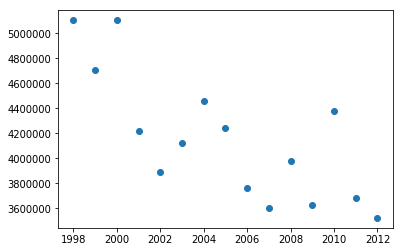

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

### Create and Fit a Linear Regression Model

In [33]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Slope of the line
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238195
181208083.10732982


### Create y_predict

In [35]:
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934687 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


### Plot Linear Regression

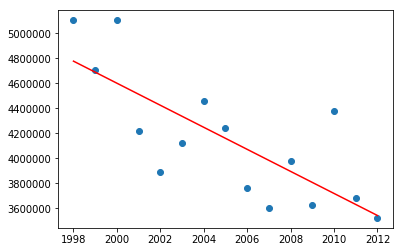

In [36]:
plt.scatter(X, y)
plt.plot(X, y_predict, c="r")
plt.show()


### Predict the Honey Decline

In [37]:
import numpy as np

# Future prediction 
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)

future_predict = regr.predict(X_future)


### Plot Future Prediction

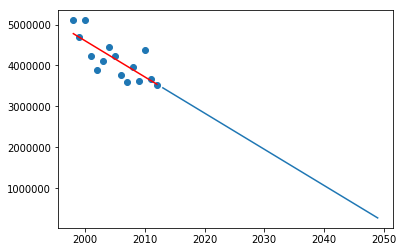

In [38]:
plt.scatter(X, y)
plt.plot(X, y_predict, c="r")
plt.plot(X_future, future_predict)
plt.show()

### Estimate Honey Production in 2040

In [40]:
estimate_prod = regr.predict(2040)
print(estimate_prod)

[1069577.23647064]


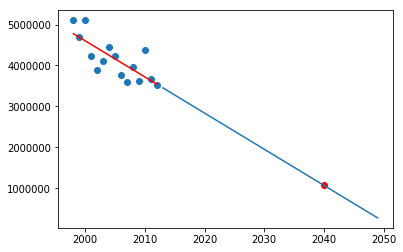

In [42]:
plt.scatter(X, y)
plt.plot(X, y_predict, c="r")
plt.plot(X_future, future_predict)
plt.scatter(2040, estimate_prod, c='r')
plt.show()